In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# set workdir
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

# set the font size of the figure
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 1

axis_fontdict={'fontsize':8,'fontweight':'bold'}
label_fontdict={'fontsize':10,'fontweight':'bold'}
title_fontdict={'fontsize':12,'fontweight':'bold'}

#### 1. Comparative Analysis of Pan-genomes:
- The manuscript would benefit from a detailed comparison between the current pan-genome and previous ones, specifically Sce-pan1011. It is unclear how different these pan-genomes are beyond the number of strains or genes. An analysis and visualization highlighting the ecological and functional differences would add significant value.
- Since the release of Sce-pan1011 in 2021, it is not evident whether there has been a significant advancement in strain collection or if the differences stem primarily from filtering and data processing methods. This distinction should be clearly addressed.

In [2]:
# load strain information
all_strain_info=pd.read_excel('data/1897_strains_info.xlsx',index_col=0)
all_strain_info.head()

df_geneMatrix=pd.read_csv(r'data/geneMatrix/pan1800_v2_blastp_50_70_geneMatrix.csv',index_col=0)
strainList=df_geneMatrix.columns.tolist()
strainList=[strain.replace('.fa','') for strain in strainList]
# only keep the strains in the strain information
all_strain_info=all_strain_info[all_strain_info.index.isin(strainList)]
# remove dulicate
all_strain_info=all_strain_info[~all_strain_info.index.duplicated()]

all_strain_info['type_L3']=all_strain_info['type_L3'].str.strip()
# replace all space in type_L3 into _
all_strain_info['type_L3']=all_strain_info['type_L3'].str.replace(' ','_')


df_type_count=pd.DataFrame(index=all_strain_info['type_L3'].value_counts().index)
df_type_count['total']=all_strain_info['type_L3'].value_counts()
df_type_count['1011_strains']=all_strain_info[all_strain_info['source']=='1011_nature']['type_L3'].value_counts()
df_type_count['new_strains']=all_strain_info[all_strain_info['source']!='1011_nature']['type_L3'].value_counts()

# fill nan as 0
df_type_count=df_type_count.fillna(0)

In [19]:
# save the result
df_type_count.to_csv(r'code/1.genome_collection/outputs/niche_comparison_1807_vs_1011.csv')

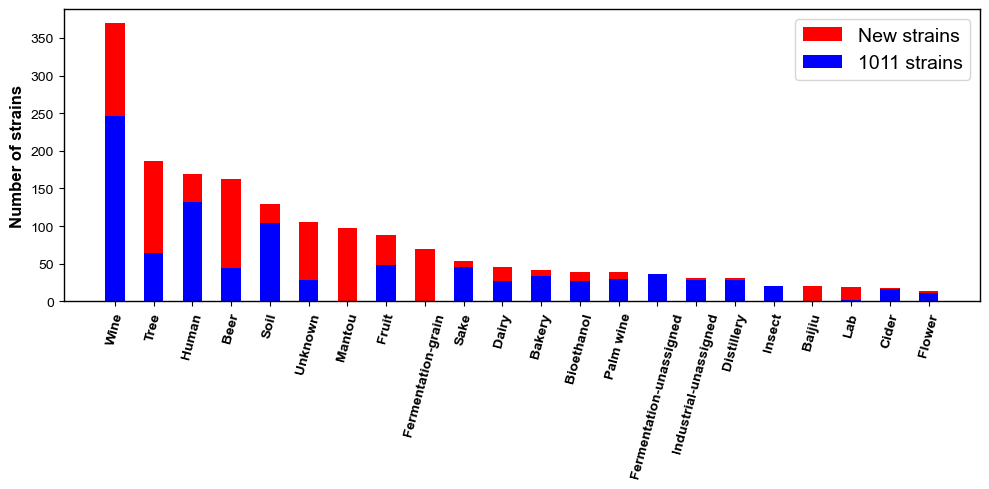

In [20]:
# remove total number less than 10
df_type_count=df_type_count[df_type_count['total']>10]
# plot bar plot
fig = plt.figure(figsize=(10,5))
width=0.5
x_list=np.arange(len(df_type_count))
plt.bar(x_list,df_type_count['total'],width=width,label='New strains',color='r')
plt.bar(x_list,df_type_count['1011_strains'],width=width,label='1011 strains',color='b')
plt.xticks(x_list,df_type_count.index,rotation=75,fontdict=label_fontdict)
# set y label
plt.ylabel('Number of strains',fontdict=title_fontdict)
# set legend size
plt.legend(prop={'size': 14})
plt.tight_layout()
plt.show()

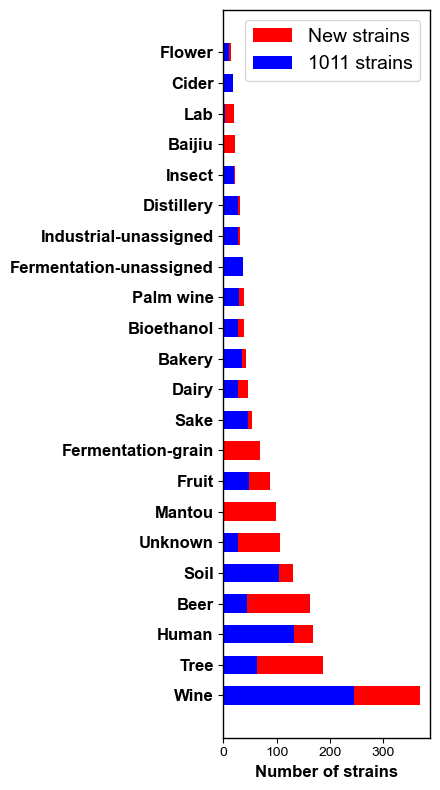

In [18]:
# convert the x and y, and plot the bar plot in vertical
# remove total number less than 10
df_type_count = df_type_count[df_type_count['total'] > 10]
# replace all _ into space
df_type_count.index = df_type_count.index.str.replace('_', ' ')
# plot bar plot
fig = plt.figure(figsize=(4.5, 8))
width = 0.6
y_list = np.arange(len(df_type_count))
plt.barh(y_list, df_type_count['total'], height=width, label='New strains', color='r')
plt.barh(y_list, df_type_count['1011_strains'], height=width, label='1011 strains', color='b')
plt.yticks(y_list, df_type_count.index, rotation=0, fontsize=12, fontweight='bold')
# set x label
plt.xlabel('Number of strains', fontdict=title_fontdict)
# set legend size
plt.legend(prop={'size': 14})
plt.tight_layout()
plt.show()


#### 2. ssGEM reconstruction: Authors have used GIMME published in 2008 to integrate OMICS data. There are a host of new methods to do this such as TINIT etc and authors have to compare these more sophisticated and modern methods.

#### 3. Addressing Knowledge Gaps in Gene Annotations:
• The large number of genes in the ssGEMs classified as "unknown" is a significant weakness. The manuscript would be greatly strengthened by additional analyses to address these knowledge gaps, such as performing a BLASTp analysis to identify homologous gene functions. This could reveal patterns in the hits' functions and contribute to a better understanding of these unknown genes.


#### 4. Methodological Clarity and Reproducibility:
- The setup and structure of the PCA and Random Forest Classification models (e.g., Figure 5b) are unclear. The manuscript should clarify how the input data was structured, what the classifier outputs were, and how the PCA fits into the overall analysis. This is crucial for both interpretation and reproducibility.
- The manuscript mentions that flux and transcription correlation analysis implies that changes in gene expression do not always reflect changes in flux. However, there is no discussion or hypothesis provided to explain this inconsistency. A deeper exploration of these results is necessary, particularly if transcriptomic data is being used to validate ssGEMs.

#### 5. Comparison with Experimental Data:
• While the manuscript focuses on gene reduction as the main analysis method, Extended Figure 7, which compares ssGEMs to experimental data, provides more compelling results. Expanding this analysis and applying it to the other two pan-genomes would significantly support the manuscript's claims. Demonstrating that the ssGEMs derived from this new pan-genome outperform those from previous pan-genomes would strengthen the argument for the pipeline's effectiveness.


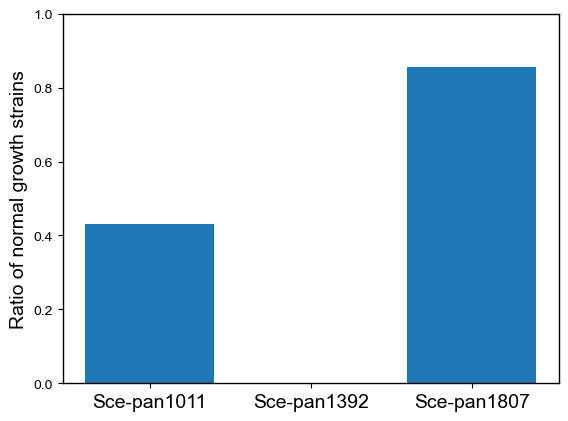

In [7]:
df_1011_ssGEMs=pd.read_csv(r'result/model_simulation/df_pan1011_ssGEMs_size.csv',index_col=0)
df_1392_ssGEMs=pd.read_csv(r'result/model_simulation/df_pan1392_ssGEMs_size.csv',index_col=0)
df_1807_ssGEMs=pd.read_csv(r'result/model_simulation/df_ssGEMs_size.csv',index_col=0)

growth_ratios=[
    len(df_1011_ssGEMs[df_1011_ssGEMs['aerobic_growth']>0.01])/len(df_1011_ssGEMs),
    len(df_1392_ssGEMs[df_1392_ssGEMs['aerobic_growth']>0.01])/len(df_1392_ssGEMs),
    len(df_1807_ssGEMs[df_1807_ssGEMs['aerobic_growth']>0.01])/len(df_1807_ssGEMs)
]
# plot the barplot
plt.bar(['Sce-pan1011','Sce-pan1392','Sce-pan1807'],growth_ratios)
plt.ylabel('Ratio of normal growth strains',fontsize=14)
# set y 0-1
plt.ylim([0, 1])
# set the x ticks fontsize
plt.xticks(fontsize=14)
plt.show()

#### 6. Comparative Genomic Analysis:
• The discussion mentions future comparative genomic analyses, such as SVs and SNPs. However, a smaller-scale comparative analysis could be conducted within this work, particularly utilizing MMSeqs2, which was already employed for filtering and processing. Understanding the diversity within the strains post-filtering, including the identification of outlier genes, would be an important addition.


#### 7. Relevance of the multidimensional analysis: Using the model to predict ethanol production capability by these new models is interesting but what is not clear is whether these were because of the newer model. Can the older pan genome also do this prediction and if not why and what is the mechanism in the newer model. If the older model can also predict this then what is the value of the newer pan genome model apart from the fact that it is bigger? Also there is value in strain specific models compared to a single pan genome model but nevertheless authors have to address how this prediction is novel for their models.